Бизнес цель получать данные о пригодности воды для питья имея данные о химическом составе, потому что зачастую при анализе пробы воды нам не возвращают ничего кроме хим состава, тем самым мы можем узнать питьевая вода или нет.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
from matplotlib import pyplot as plt
import plotly.express as px
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold
from sklearn.metrics import accuracy_score, recall_score, f1_score

За основу взят датасет о содержаниях веществ в воде и пригодности для питья, где 1 означает что вода пригодна, а 0 не пригодна
Данный датасет имеет несколько показателей воды, такие как:
1 ph - кислотно-щелочной баланс
2 Жесткость
3 Примеси 
4 Хлор
5 Сульфаты
6 Элетропроводимость
7 Органический углерод
8 Тригалометаны
9 Пригодность для питья

In [2]:
df = pd.read_csv('water_potability.csv')
df.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


Как видим что несколько значений в столбцах ph, sulfate, trihalometanes отсутствуют

In [4]:
df.shape # размер датасета

(3276, 10)

Размер датасета 3276 строк и 10 колонок

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7eff04823850>,
      dtype=object)

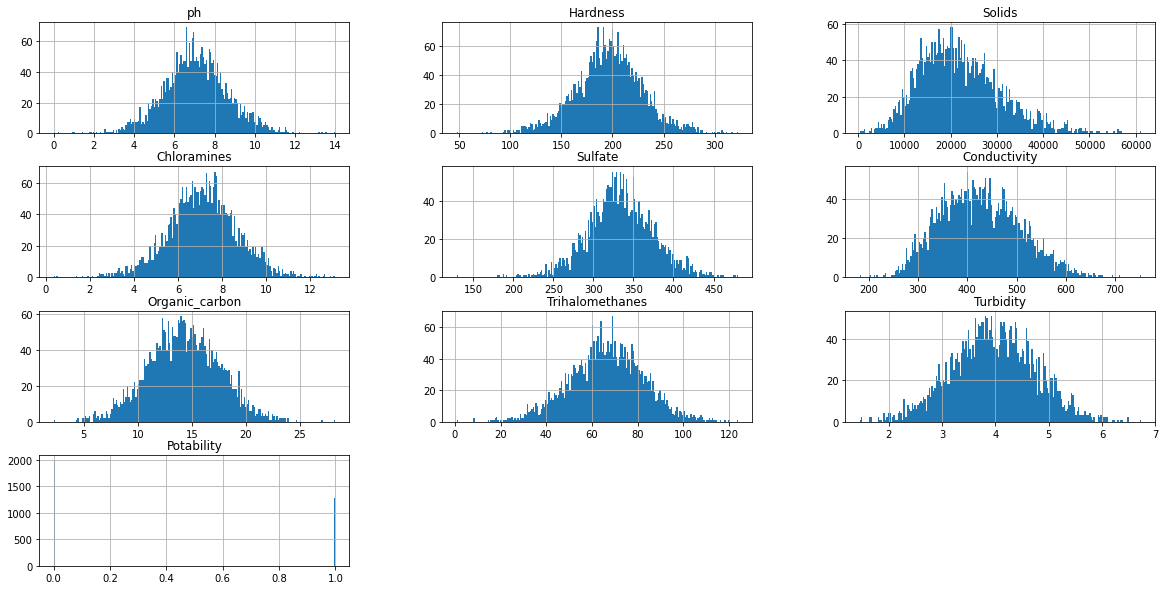

In [5]:
df.hist(bins=200,figsize=[20,10]) # графическое представление в в виде гистограмм

Проверим есть ли пустые значения?

In [6]:
df.isnull().sum() # количество пустых строк в столбцах 

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

Почистим датасет от пустых строк, иначе данные могут быть недостаточно правдивы

In [7]:
df.dropna(how='any',inplace=True)
df

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0
5,5.584087,188.313324,28748.687739,7.544869,326.678363,280.467916,8.399735,54.917862,2.559708,0
6,10.223862,248.071735,28749.716544,7.513408,393.663396,283.651634,13.789695,84.603556,2.672989,0
7,8.635849,203.361523,13672.091764,4.563009,303.309771,474.607645,12.363817,62.798309,4.401425,0
...,...,...,...,...,...,...,...,...,...,...
3267,8.989900,215.047358,15921.412018,6.297312,312.931022,390.410231,9.899115,55.069304,4.613843,1
3268,6.702547,207.321086,17246.920347,7.708117,304.510230,329.266002,16.217303,28.878601,3.442983,1
3269,11.491011,94.812545,37188.826022,9.263166,258.930600,439.893618,16.172755,41.558501,4.369264,1
3270,6.069616,186.659040,26138.780191,7.747547,345.700257,415.886955,12.067620,60.419921,3.669712,1


Как видим после удаления пустых значений у нас осталось 2011 строк

In [8]:
df['Potability'].value_counts() #количество строк в столбце "пригодность для питья"

0    1200
1     811
Name: Potability, dtype: int64

Из датасета мы видим что большее количество воды указанное в датасете не пригодно для питья

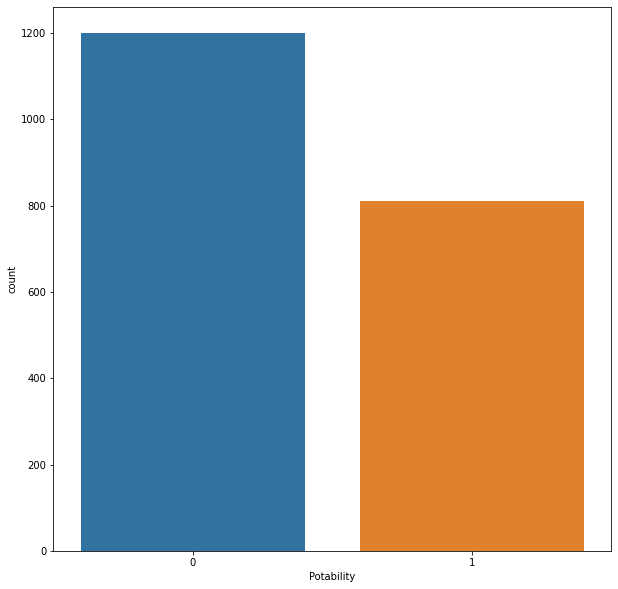

In [9]:
plt.figure(figsize=(10,10)) # отобразим на графике
sns.countplot(x='Potability',data=df)
plt.show()

**Как мы видим что в датасете представлены 1200 значений непригодной для питья воды, и 811 пригодной для питья.**

In [10]:
df[df['Potability']==0].describe() # отбор значений не пригодной для питья воды

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.0
mean,7.067201,196.008440,21628.535122,7.107267,333.742928,427.554342,14.400250,66.278712,3.955181,0.0
std,1.659106,30.717642,8461.108693,1.476577,36.398403,79.882677,3.370196,15.931953,0.782984,0.0
min,1.431782,98.452931,320.942611,2.456014,203.444521,210.319182,4.371899,14.343161,1.450000,0.0
25%,5.982888,177.313440,15378.907323,6.169384,310.653441,369.580980,12.118659,56.152070,3.444706,0.0
50%,6.992004,196.799368,20507.399647,7.103718,332.615625,424.479471,14.351828,66.206116,3.944085,0.0
75%,8.141979,214.532109,26786.546213,8.076759,356.432048,482.333786,16.787531,77.144621,4.497522,0.0
max,14.000000,300.292476,55334.702799,12.653362,460.107069,753.342620,27.006707,120.030077,6.494749,0.0


In [11]:
df[df['Potability']==0][['ph','Sulfate','Trihalomethanes']].median() 

ph                   6.992004
Sulfate            332.615625
Trihalomethanes     66.206116
dtype: float64

In [12]:
df[df['Potability']==1][['ph','Sulfate','Trihalomethanes']].median()

ph                   7.046549
Sulfate            331.087177
Trihalomethanes     66.612984
dtype: float64

Как мы видим среднее значение Сульфатов, Тригалометанов, и ph воды не сильно отражается на пригодности для питья, результаты примерно одинаковые





In [13]:
# df['ph'].fillna(value=df['ph'].median(),inplace=True)
# df['Sulfate'].fillna(value=df['Sulfate'].median(),inplace=True)
# df['Trihalomethanes'].fillna(value=df['Trihalomethanes'].median(),inplace=True)

In [14]:
# df.isnull().sum()# заполнили пустые значения

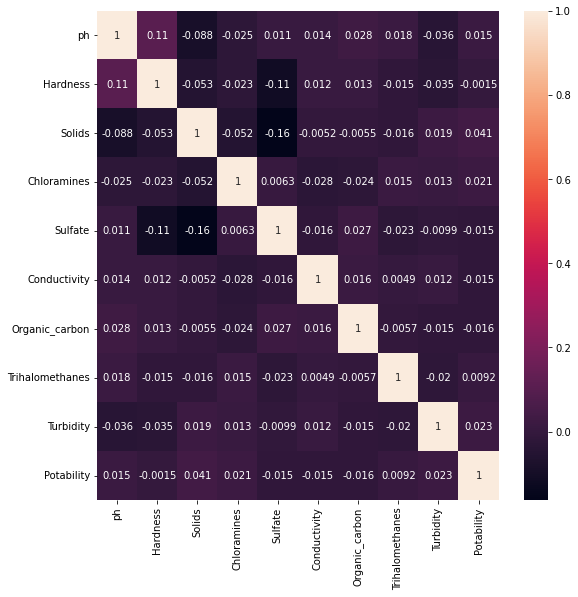

In [15]:
plt.figure(figsize=(9,9)) #теперь представим в  виде корреляционной матрицы

corrMatrix=df.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [16]:
feature_cols=['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity',]

Посмотрим на отношение разных признаков, к пригодности для питья

In [17]:
non_potable = df[df['Potability']==0]
potable = df[df['Potability']==1]

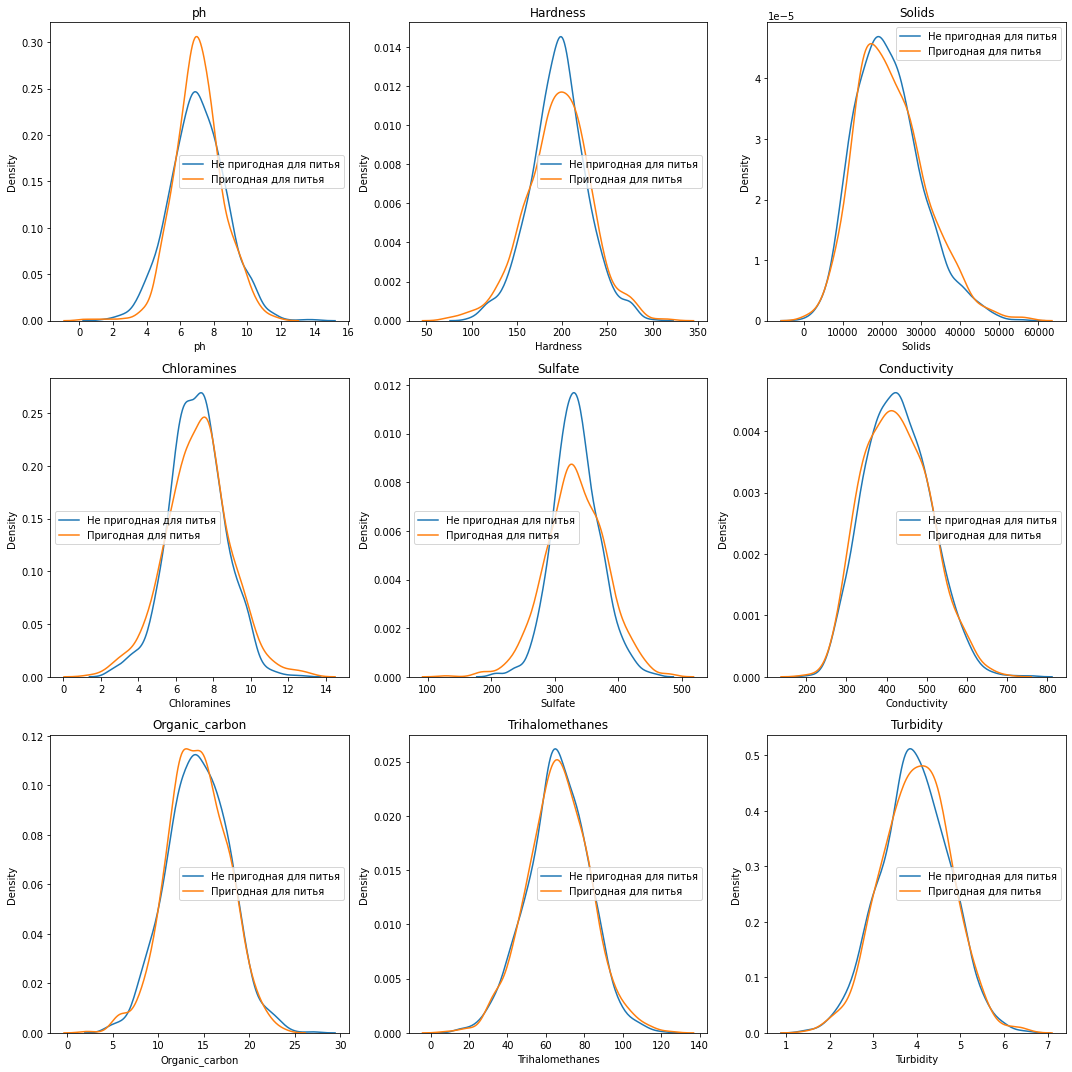

In [18]:
plt.figure(figsize = (15,15))
for i, col in enumerate(df.columns[:9]):
    plt.subplot(3,3, i+1)
    plt.title(col)
    sns.kdeplot(x = non_potable[col], label = "Не пригодная для питья")
    sns.kdeplot(x = potable[col], label = "Пригодная для питья")
    plt.legend()
plt.tight_layout()

In [19]:
plt.figure(figsize=(1,3))
px.histogram(df['ph'],color=df['Potability'])

<Figure size 72x216 with 0 Axes>

In [20]:
plt.figure(figsize=(1,3))
px.histogram(df['Sulfate'],color=df['Potability'])

<Figure size 72x216 with 0 Axes>

In [21]:
plt.figure(figsize=(1,3))
px.histogram(df['Trihalomethanes'],color=df['Potability'])

<Figure size 72x216 with 0 Axes>

In [22]:
plt.figure(figsize=(1,3))
px.histogram(df['Hardness'], color=df['Potability'])


<Figure size 72x216 with 0 Axes>

In [23]:
plt.figure(figsize=(1,3))
px.histogram(df['Solids'],color=df['Potability'])

<Figure size 72x216 with 0 Axes>

In [24]:
plt.figure(figsize=(1,3))
px.histogram(df['Conductivity'],color=df['Potability'])

<Figure size 72x216 with 0 Axes>

In [25]:
plt.figure(figsize=(1,3))
px.histogram(df['Organic_carbon'],color=df['Potability'])

<Figure size 72x216 with 0 Axes>

In [26]:
plt.figure(figsize=(1,3))
px.histogram(df['Chloramines'],color=df['Potability'])

<Figure size 72x216 with 0 Axes>

Начинаем обучение нашей модели

In [27]:
x = df.drop('Potability',axis=1).values # разделим датасет для обучения на 2 части
y = df['Potability'].values

In [28]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=101)

In [29]:
sc = StandardScaler()
sc.fit(x_train)
x_train = sc.transform(x_train)
x_test = sc.transform(x_test)

In [30]:
models =[("LR", LogisticRegression()),("SVC", SVC()),('KNN',KNeighborsClassifier(n_neighbors=10)),
         ("DTC", DecisionTreeClassifier()),
        ("SGDC", SGDClassifier()),("Perc", Perceptron()),("NC",NearestCentroid()),
        ("Ridge", RidgeClassifier()),("NuSVC", NuSVC()),
         ('RF',RandomForestClassifier()),('ADA',AdaBoostClassifier()),
        ('XGB',GradientBoostingClassifier()),('PAC',PassiveAggressiveClassifier())]

results = []
names = []
finalResults = []
modelr = []

for name,model in models:
    model.fit(x_train, y_train)
    model_results = model.predict(x_test)
    score = precision_score(y_test, model_results,average='macro')
    acur_score = accuracy_score(y_test, model_results)
    f1 = f1_score(y_test, model_results)
    results.append(score)
    names.append(name)
    finalResults.append((name,score,acur_score,f1))
    modelr.append(model_results)
    
finalResults.sort(key=lambda k:k[1],reverse=True)

In [31]:
finalResults

[('SVC', 0.7199457740909898, 0.695364238410596, 0.5208333333333333),
 ('RF', 0.7019867549668874, 0.6920529801324503, 0.5396039603960395),
 ('XGB', 0.669311911716975, 0.6605960264900662, 0.4647519582245431),
 ('NuSVC', 0.6531649450497619, 0.6639072847682119, 0.5726315789473685),
 ('KNN', 0.6515686828716789, 0.6440397350993378, 0.4173441734417344),
 ('Ridge', 0.6245146977260122, 0.5827814569536424, 0.015625),
 ('DTC', 0.6030264588619065, 0.6142384105960265, 0.5349301397205589),
 ('ADA', 0.5829225004929994, 0.6026490066225165, 0.3939393939393939),
 ('SGDC', 0.5419303797468354, 0.5380794701986755, 0.5096660808435852),
 ('LR', 0.5408333333333333, 0.5811258278145696, 0.01556420233463035),
 ('PAC', 0.5346139905762958, 0.5480132450331126, 0.45508982035928147),
 ('Perc', 0.48702345317588236, 0.4867549668874172, 0.44244604316546765),
 ('NC', 0.4569805194805195, 0.4586092715231788, 0.4043715846994535)]

все модели показали не самую хорошую точность

Как мы видим что лучшая точность в методе опорных векторов, на втором месте randomforestclassifier

In [ ]:
modelr

In [33]:
sv = SVC()
sv.fit(x_train, y_train)
predictions = sv.predict(x_test)

Итак у нас есть обученная модель

В дальнейшем хотелось бы обучить модель и интегрировать её в бота для получения данных о воде 
